# Task 1: Data Exploration and Processing

## Part 1: Explore your specific dataset
by calculating basic statistics number of samples and number of samples per class: is your dataset balanced? min / avg / max length of text reading through 100+ samples: noteworthy style, vocabulary, idioms.

### Imports

In [61]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load Data

In [83]:
def load_medical_dataset(dataset_name="argilla/medical-domain", split='train'):
    """
    Loads the dataset

    Parameters:
        dataset_name (string): Defaults to medical-domain dataset from Hugging Face*

    Returns:
        DataFrame
    """
    try:
        # Load the dataset
        dataset = load_dataset(dataset_name, split=split)
        print("Dataset loaded successfully!")
        df = pd.DataFrame(dataset)
        
        return df
    
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None
    

In [84]:
df = load_medical_dataset()


Dataset loaded successfully!


### Data Visualization/Analysis

**Basic statistics**

In [86]:
def extract_labels_and_text_length(df):
    def extract_values(dictionary, key):
        '''
        Extract values from dicts within prediction and metrics columns
        '''
        if type(dictionary) != dict:
            dictionary = dictionary[0]
        return dictionary[key]

    # Extract labels from prediction col
    df['label'] = df['prediction'].apply(lambda x: pd.Series(extract_values(x, 'label')))

    # Extract text_length from metrics col
    df['text_length'] = df['metrics'].apply(lambda x: pd.Series(extract_values(x, 'text_length')))

    return df

def analyze_dataset_statistics(df):
    """
    Analyze the length of text and distribution of samples across different classes in the dataset

    Parameters
        dataset: dict(pd.DataFrame)

    Returns
        class_counts: dict(pd.Series), key=split_name, value=(pd.Series, index=label and value=class_count)
    """
        # Display number of samples
    print(f"Number of samples: {len(df)}")
    print(f"\tFeatures: {df.columns}")

    df = extract_labels_and_text_length(df) # with additional features now (label and text_length)
    
    # Calculate Min, Avg, Max length of text
    min_length = df['text_length'].min()
    avg_length = df['text_length'].mean()
    max_length = df['text_length'].max()
    print(f"\tText length:\n\t\tMin: {min_length}\n\t\tAvg: {avg_length:.2f}\n\t\tMax: {max_length}")
    
    print("\nAnalyzing class distribution:")

    # Count samples per class
    
    class_counts = (df.groupby(['label']).size()).sort_values(ascending=False)
    
    # Display results
    for label, class_count in class_counts.items():
        print(f"{label}: {class_count} samples ({100*class_count/len(df):.2f}%)")
    return class_counts


In [87]:
class_distribution = analyze_dataset_statistics(df)

Number of samples: 4966
	Features: Index(['text', 'inputs', 'prediction', 'prediction_agent', 'annotation',
       'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata',
       'status', 'event_timestamp', 'metrics'],
      dtype='object')
	Text length:
		Min: 11
		Avg: 3052.31
		Max: 18425

Analyzing class distribution:
 Surgery: 1088 samples (21.91%)
 Consult - History and Phy.: 516 samples (10.39%)
 Cardiovascular / Pulmonary: 371 samples (7.47%)
 Orthopedic: 355 samples (7.15%)
 Radiology: 273 samples (5.50%)
 General Medicine: 259 samples (5.22%)
 Gastroenterology: 224 samples (4.51%)
 Neurology: 223 samples (4.49%)
 SOAP / Chart / Progress Notes: 166 samples (3.34%)
 Urology: 156 samples (3.14%)
 Obstetrics / Gynecology: 155 samples (3.12%)
 Discharge Summary: 108 samples (2.17%)
 ENT - Otolaryngology: 96 samples (1.93%)
 Neurosurgery: 94 samples (1.89%)
 Hematology - Oncology: 90 samples (1.81%)
 Ophthalmology: 83 samples (1.67%)
 Nephrology: 81 samples (1.63%)
 Eme

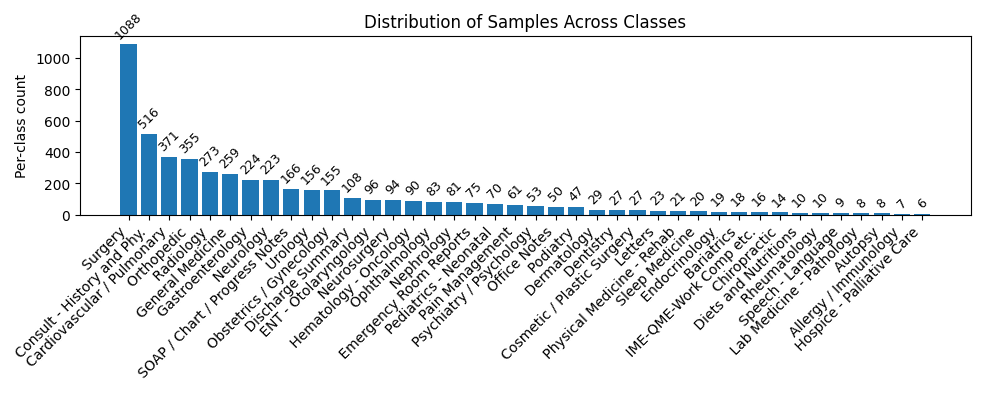

In [88]:
x = range(len(class_distribution))
plt.figure(figsize=(10,4))
plt.bar(x, height=class_distribution.values)
plt.ylabel("Per-class count")
plt.xticks(x, class_distribution.index, rotation=45, ha='right')

for i, value in enumerate(class_distribution.values):
    plt.text(i, value + 0.02 * max(class_distribution.values), str(value), 
                ha='center', va='bottom', fontsize=9, rotation=45)
plt.title(f"Distribution of Samples Across Classes")
plt.tight_layout()
plt.show()

### [Comments on dataset]

Dataset is not balanced, both in terms of text length and class sizes.

In [89]:
# Load into a DataFrame for easier handling
new_df = pd.DataFrame({
    "text": df['text'],
    "label": df['label']
})
print(new_df.head(10))
df = new_df


                                                text  \
0  PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...   
1  CLINICAL INDICATION:  ,Normal stress test.,PRO...   
2  FINDINGS:,Axial scans were performed from L1 t...   
3  PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...   
4  REASON FOR VISIT:  ,Elevated PSA with nocturia...   
5  XYZ, O.D.,RE:  ABC,DOB:  MM/DD/YYYY,Dear Dr. X...   
6  PREOPERATIVE DIAGNOSES:,1.  Intrauterine pregn...   
7  REASON FOR CT SCAN: , The patient is a 79-year...   
8  CLINICAL HISTORY: , Patient is a 37-year-old f...   
9  INDICATION: , Iron deficiency anemia.,PROCEDUR...   

                            label  
0                Gastroenterology  
1                         Surgery  
2                       Radiology  
3                         Surgery  
4   SOAP / Chart / Progress Notes  
5                         Letters  
6                         Surgery  
7                       Radiology  
8        Lab Medicine - Pathology  
9                      

### Display a few samples per class

In [90]:
# number of examples per class (adjust if needed)
examples_per_class = 3

# loop over each unique label
for label_name in sorted(df['label'].dropna().unique()):
    print(f"\n{'='*20} {label_name} {'='*20}")
    subset = df[df['label'] == label_name]
    
    # sample up to 'examples_per_class' texts from this class
    sample_texts = subset['text'].sample(min(len(subset), examples_per_class), random_state=42)
    
    for i, text in enumerate(sample_texts, start=1):
        # shorten text and replace newlines for readability
        preview = str(text).replace('\n', ' ')[:400]
        print(f"\nExample {i}:\n{preview} ...")




====================  Allergy / Immunology ====================

Example 1:
HISTORY:,  I had the pleasure of meeting and evaluating the patient referred today for evaluation and treatment of chronic sinusitis.  As you are well aware, she is a pleasant 50-year-old female who states she started having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.  She states she really has sinus problems, but  ...

Example 2:
SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not ...

Example 3:
HISTORY: , A 34-year-old male presents today self-referred at the recommendation of Emerg

### Data Cleaning

In [92]:
# Visualising entries where text contains < n chars

n_chars = 40 # tried and this is the highest n that doesn't include entries with meaningful text
def get_short_text_idx(df):
    short_idx = [i for i, t in enumerate(df['text']) if len(t) < n_chars]
    short_df = df.loc[short_idx, ['label', 'text']]
    print(short_df.to_string(index=True))
    return short_idx


#### Data Cleaning Decisions

Based on the information above.

##### 1. Remove entries where the text length is < 40 chars

In [93]:
short_text_idx = get_short_text_idx(df)
print("Initial lenth: ", len(df))
df = df.drop(index=short_text_idx)
print("Removed length: ", len(short_text_idx))
print("New length: ", len(df))


                               label                     text
14                  General Medicine             SUBJECTIVE:,
613                     Chiropractic  REASON FOR EVALUATION:,
1181                       Radiology            INDICATIONS:,
1381                      Orthopedic  REASON FOR EVALUATION:,
1415                    Office Notes        CHIEF COMPLAINT:,
1638                 Pain Management              OPERATION:,
1715                         Surgery           INDICATION:  ,
1784                    Office Notes      CHIEF COMPLAINT:  ,
2493                         Urology        CHIEF COMPLAINT:,
2791      Consult - History and Phy.        CHIEF COMPLAINT:,
3205                Gastroenterology           INDICATION:  ,
3849      Cardiovascular / Pulmonary            INDICATIONS:,
3886   SOAP / Chart / Progress Notes             SUBJECTIVE:,
4160                      Orthopedic        CHIEF COMPLAINT:,
4371                      Orthopedic      CHIEF COMPLAINT:  ,
4933    

##### 2. Add dataset-specific stopwords to be filtered out

In [94]:
def get_specific_stopwords(df, min_stopword_len=5):
    caps = []
    word = ''
    def _find_cap(s):
        for ele in str(s):
            if ord(ele) < 65 or ord(ele) > 90:
                return 0
        return 1
    texts = df['text']
    for text in texts: 
        for char in text:
            if _find_cap(char):
                word += char
            elif len(word) > 0:
                if char == ':': # stop if the word has : at the end
                    caps.append(word)
                    word = ''
                elif char == ' ' and word[-1] != ' ': # continue if there is a space detected but not 2 in a row
                    word += char
                elif len(word) >= min_stopword_len: # final char is neither caps nor :, maybe >1 space in a row
                    word = word[:-1] if word[-1] == ' ' else word
                    caps.append(word)
                    word = ''
                else: # 2 spaces in a row and length < min_stopword_len
                    word = ''
    return caps

In [101]:
capital_words = get_specific_stopwords(df, min_stopword_len=6)
unique_terms, counts = np.unique(capital_words, return_counts=True)
result = np.vstack((unique_terms, counts)).T
result = result[np.argsort(-counts.astype(int), kind="stable")]

for i in range(len(result)):
    print(f"{i}. {result[i,:]}" )

0. ['PERFORMED' '750']
1. ['IN DETAIL' '429']
2. ['AND ' '385']
3. ['FOR ' '251']
4. ['ABCD G' '121']
5. ['FOR SURGERY' '97']
6. ['ABCD H' '75']
7. ['NOTE' '63']
8. ['DISCHARGE ' '58']
9. ['DETAILS' '56']
10. ['DETAIL' '54']
11. ['FOR THE ' '50']
12. ['EXAMINATION' '49']
13. ['APPEARANCE' '44']
14. ['FINAL ' '40']
15. ['DETAILS OF THE ' '39']
16. ['OF ' '39']
17. ['ON DISCHARGE' '39']
18. ['AND PHYSICAL' '38']
19. ['OPERATIVE ' '32']
20. ['TITLE OF ' '32']
21. ['FAMILY' '31']
22. ['ADMISSION ' '29']
23. ['REASON FOR REFERRAL' '29']
24. ['HEAD' '28']
25. ['LABS' '28']
26. ['MEDICAL ' '28']
27. ['PATHOLOGY' '28']
28. ['RECEIVED' '28']
29. ['DERMATOLOGIC' '27']
30. ['ACTIVITY' '26']
31. ['DESCRIPTION OF ' '26']
32. ['LVEDP' '26']
33. ['MEDICATION' '26']
34. ['NOSE' '26']
35. ['P' '26']
36. ['POSTOPERATIVE ' '26']
37. ['SECONDARY ' '26']
38. ['DESCRIPTION' '25']
39. ['DETAILS OF ' '25']
40. ['FOLLOWUP' '25']
41. ['MENTAL STATUS' '25']
42. ['MENTAL STATUS EXAMINATION' '25']
43. ['POSTPROCED

###### Store selected stopwords in csv

In [ ]:
min_stopword_frequency = 30 # NOTE try changing this value
custom_stopwords = result[result[:, 1].astype(int) >= 30][:, 0]
print(custom_stopwords)
(pd.DataFrame(custom_stopwords)).to_csv('custom_stopwords.csv',sep=',',header=False, index=False)

['ANESTHESIA' 'PROCEDURE' 'PREOPERATIVE DIAGNOSIS'
 'POSTOPERATIVE DIAGNOSIS' 'PHYSICAL EXAMINATION'
 'HISTORY OF PRESENT ILLNESS' 'IMPRESSION' 'HEENT' 'ALLERGIES'
 'PAST MEDICAL HISTORY' 'REVIEW OF SYSTEMS' 'SOCIAL HISTORY' 'PLAN'
 'COMPLICATIONS' 'MEDICATIONS' 'FINDINGS' 'FAMILY HISTORY'
 'ESTIMATED BLOOD LOSS' 'VITAL SIGNS' 'PROCEDURE PERFORMED' 'ABDOMEN'
 'POSTOPERATIVE DIAGNOSES' 'GENERAL' 'PREOPERATIVE DIAGNOSES' 'NECK'
 'EXTREMITIES' 'ASSESSMENT' 'CHIEF COMPLAINT' 'HISTORY'
 'DESCRIPTION OF PROCEDURE' 'LUNGS' 'INDICATIONS' 'PAST SURGICAL HISTORY'
 'EXAM' 'CARDIOVASCULAR' 'PROCEDURE IN DETAIL' 'HEART' 'NEUROLOGIC'
 'CURRENT MEDICATIONS' 'SKIN' 'LABORATORY DATA' 'CHEST' 'SUBJECTIVE'
 'MUSCULOSKELETAL' 'PROCEDURES' 'DISPOSITION' 'RECOMMENDATIONS'
 'SPECIMENS' 'HOSPITAL COURSE' 'OPERATIVE PROCEDURE' 'TECHNIQUE'
 'ASSESSMENT AND PLAN' 'OBJECTIVE' 'OPERATION PERFORMED' 'DRAINS' 'CC'
 'INDICATIONS FOR PROCEDURE' 'PMH' 'GU' 'HX' 'COURSE' 'PHYSICAL EXAM'
 'RESPIRATORY' 'INDICATION' 'PROC

## Part 2 Establish a structured and flexible (configurable) processing pipeline 
with steps for reading documents from file tokenizing normalizing (lowercase, lemmatize/stem, …) filtering (stop words, …)
Use the script clustering.py as a template for clustering your text

**Data cleaning pipeline**

1. Stop word removal (*use identified stopwords in custom_stopwords.csv)
2. Tokenization
3. Normalization (lemmatize)
4. Filter (stopwords)

### 1. Remove custom stopwords from dataset

Before tokenization.
Use regex patterns to remove the identified stopwords.

In [97]:
import re

if custom_stopwords is None:
    custom_stopwords = pd.read_csv('custom_stopwords.csv', sep=',')
pattern = r"\b(" + "|".join(map(re.escape, custom_stopwords)) + r")\b"

df["clean_text"] = df["text"].str.replace(pattern, "", regex=True)
df["text"] = df["clean_text"]
df = df.drop(columns=['clean_text'])

### 2. Tokenization

In [99]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

docs = []
texts = df['text']
for doc in tokenizer.pipe(texts, batch_size=50):
    docs.append(doc)
